<font color="lightseagreen" size=+3.7><b>Periodic Table Data Gathering</b></font>

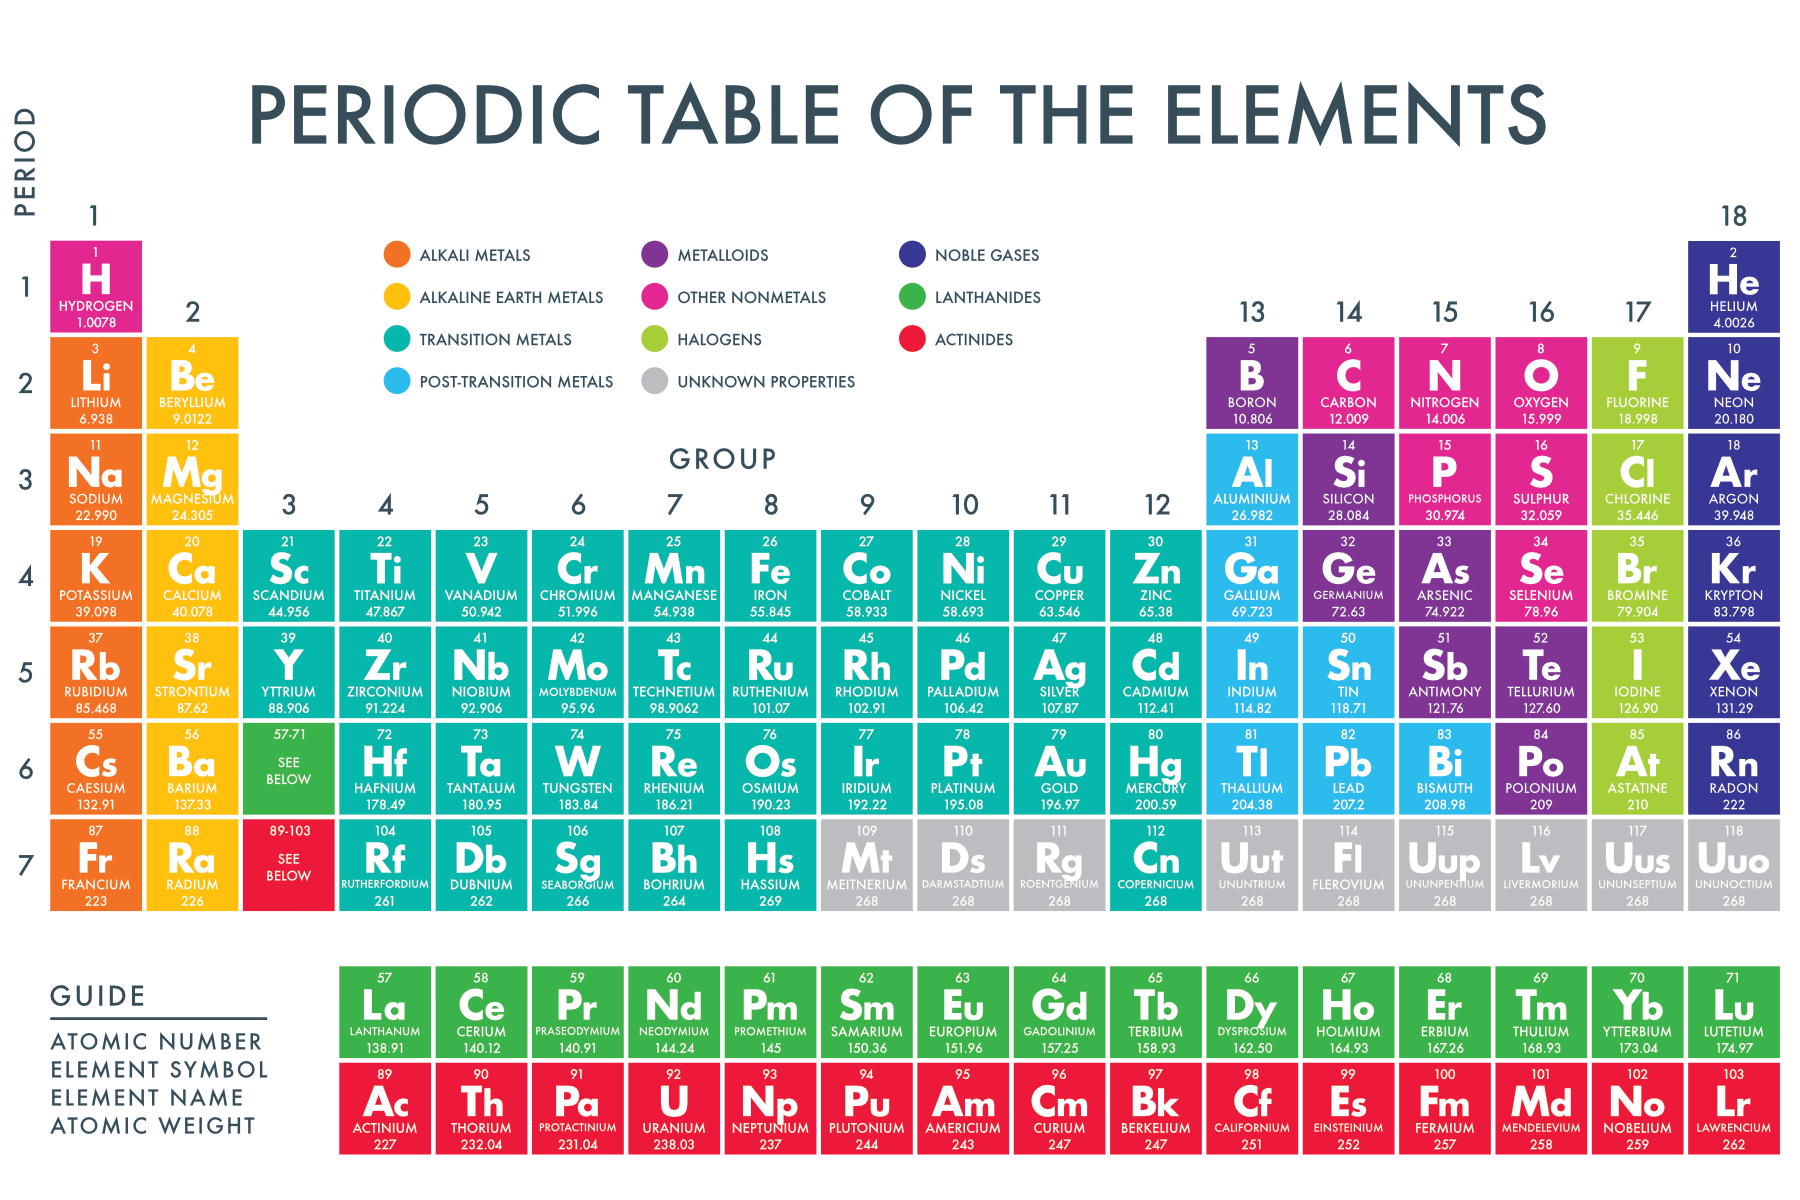

<font color="lightseagreen" size=+3.7><b>Table of Contents</b></font>

* [1. Problem Statement](#1)<br>
* [2. Importing packages](#2)<br/>
* [3. Data Gathering](#3)<br/>
    - * [By Web Scraping](#3.1)<br/>
    - * [From Github](#3.2)<br/>
    - * [From Kaggle](#3.2)<br/>
* [4. Data Merging](#4)<br/>

<a id="1"></a>

<font color="lightseagreen" size=+2><b>1. Problem Statement</b></font> 

- The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __(Data Gathering)__ for analysis purpose.

- __In this study__, we will try to see if we can explore the __Metalorgy of elements__ and it's price based on different features. The features are different (__Chemical Nature__,Physical properties,Nature of Element...).

<a id="2"></a>

<font color="lightseagreen" size=+2><b>2. Importing packages</b></font> 

In [28]:
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd

<a id="3"></a>

<font color="lightseagreen" size=+2><b>2. Data Gathering</b></font> 

<a id="3.1"></a>

<font color="lightseagreen" size=+0.5><b>3.1. By Web Scraping</b></font>

- Collecting data about the prices of each element in the __periodic table__ from URL: http://www.leonland.de/elements_by_price/en/list

In [2]:
response = requests.get('http://www.leonland.de/elements_by_price/en/list')
response

<Response [200]>

In [3]:
response = response.text
soup = BeautifulSoup(response, 'html.parser')
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN">

<html lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="text/css" http-equiv="content-style-type"/>
<meta content="en" http-equiv="content-language"/>
<meta content="List of chemical elements by market price" name="description"/>
<meta content="periodic table, chemical elements, market price, elements, chemistry" name="keywords"/>
<meta content="Leon Becker" name="author"/>
<meta content="2018-10-09T20:10:02+02:00" name="date"/>
<meta content="index,follow" name="robots"/>
<meta content="notranslate" name="google"/>
<meta content="width=690" name="viewport"/>
<title>Chemical elements by market price</title>
<link href="http://www.leonland.de/elements_by_price/en/list" rel="canonical"/>
<link href="http://www.leonland.de/elements_by_price/en/" rel="start"/>
<link href="http://www.leonland.de/elements_by_price/de/list" hreflang="de" rel="alternate"/>
<link href="http://www.leonland.de/

In [4]:
table = soup.find('table', attrs={'class':"tlst"})
table

<table class="tlst" id="tlst">
<tr>
<th title="Sort ascending">Z</th>
<th class="th_v1" title="Sort ascending"><a href="/elements_by_price/en/list?sort=e" rel="nofollow">Symbol</a></th>
<th class="th_v2" title="Sort ascending"><a href="/elements_by_price/en/list?sort=e" rel="nofollow">Sym.</a></th>
<th title="Sort ascending"><a href="/elements_by_price/en/list?sort=n" rel="nofollow">Element</a></th>
<th title="Sort descending"><a href="/elements_by_price/en/list?sort=p" rel="nofollow">Price<br/>USD / kg</a></th>
<th colspan="2" title="Sort ascending"><a href="/elements_by_price/en/list?sort=r" rel="nofollow">Reference price</a></th>
<th title="Sort descending"><a href="/elements_by_price/en/list?sort=d" rel="nofollow">Date</a></th>
<th title="Sort ascending"><a href="/elements_by_price/en/list?sort=s" rel="nofollow">Source</a></th>
</tr>
<tr>
<td class="td_c">1</td>
<td class="td_c"><b><a href="http://en.wikipedia.org/wiki/Hydrogen" id="w1">H</a></b></td>
<td>Hydrogen</td>
<td class="t

In [5]:
header = table.find_all('th')
header

[<th title="Sort ascending">Z</th>,
 <th class="th_v1" title="Sort ascending"><a href="/elements_by_price/en/list?sort=e" rel="nofollow">Symbol</a></th>,
 <th class="th_v2" title="Sort ascending"><a href="/elements_by_price/en/list?sort=e" rel="nofollow">Sym.</a></th>,
 <th title="Sort ascending"><a href="/elements_by_price/en/list?sort=n" rel="nofollow">Element</a></th>,
 <th title="Sort descending"><a href="/elements_by_price/en/list?sort=p" rel="nofollow">Price<br/>USD / kg</a></th>,
 <th colspan="2" title="Sort ascending"><a href="/elements_by_price/en/list?sort=r" rel="nofollow">Reference price</a></th>,
 <th title="Sort descending"><a href="/elements_by_price/en/list?sort=d" rel="nofollow">Date</a></th>,
 <th title="Sort ascending"><a href="/elements_by_price/en/list?sort=s" rel="nofollow">Source</a></th>]

In [6]:
header_names = []
for th in header:
    
    header_names.append(th.get_text().strip())


In [8]:
header_names=['Z',
 'Symbol',
 'Element',
 'PriceUSD / kg',
 'Reference price',
 'Reference price',
 'Date',
 'Source','Source']

In [9]:
header_names= header_names[1:6]
header_names

['Symbol', 'Element', 'PriceUSD / kg', 'Reference price', 'Reference price']

In [10]:
rows = table.find_all('tr')
rows = rows[1:]
rows[0]

<tr>
<td class="td_c">1</td>
<td class="td_c"><b><a href="http://en.wikipedia.org/wiki/Hydrogen" id="w1">H</a></b></td>
<td>Hydrogen</td>
<td class="tdr">23.64</td>
<td class="tdx1">0.06</td>
<td class="tdx2"> USD per standard cubic foot (scf)</td>
<td class="td_v2" colspan="2">0.06 USD per standard cubic foot (scf)</td>
<td title="1 Mar 2013">01/03/2013</td>
<td class="tdsn_v1"><a href="http://www.praxair.com/" id="s1_1">Praxair</a></td>
<td class="tdsn_v2"><a href="http://www.praxair.com/" id="s2_1">Praxair</a></td>
</tr>

In [11]:
with open('../data/external/elements_price.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header_names)
    for row in rows:
        data = []
        
        if row.find_all('td') != []:
            
            for td in row.find_all('td')[1:6]:
                data.append(td.get_text().strip())
            writer.writerow(data)   

In [12]:
price_df=pd.read_csv('../data/external/elements_price.csv')

In [13]:
price_df

,Symbol,Element,PriceUSD / kg,Reference price,Reference price.1
0,H,Hydrogen,23.64,0.06,USD per standard cubic foot (scf)
1,He,Helium,40.39,7.21,USD per normal cubic meter
2,Li,Lithium,115.70,"800,000.00",CNY per metric ton
3,Be,Beryllium,831.60,"5,750.00",CNY per kilogram
4,B,Boron,"2,386.00","16,500.00",CNY per kilogram
...,...,...,...,...,...
113,Fl,Flerovium,price unknown,NaN,NaN
114,Mc,Moscovium,price unknown,NaN,NaN
115,Lv,Livermorium,price unknown,NaN,NaN
116,Ts,Tennessine,price unknown,NaN,NaN


<a id="3.2"></a>

<font color="lightseagreen" size=+0.5><b>3.2. From Github</b></font>

- Data from Gothub:https://github.com/neelpatel05/periodic-table-api/blob/master/data.csv

In [26]:
github_df=pd.read_csv('../data/external/periodic_table(Github).csv')

In [44]:
github_df.head(5)

,atomicNumber,symbol,name,atomicMass,cpkHexColor,electronicConfiguration,electronegativity,atomicRadius,ionRadius,vanDerWaalsRadius,ionizationEnergy,electronAffinity,oxidationStates,standardState,bondingType,meltingPoint,boilingPoint,density,groupBlock,yearDiscovered
0,1,H,Hydrogen,1.00794(4),FFFFFF,1s1,2.20,37.0,NaN,120.0,1312.0,-73.0,"-1, 1",gas,diatomic,14.0,20.0,0.000090,nonmetal,1766
1,2,He,Helium,4.002602(2),D9FFFF,1s2,NaN,32.0,NaN,140.0,2372.0,0.0,NaN,gas,atomic,NaN,4.0,0.000179,noble gas,1868
2,3,Li,Lithium,6.941(2),CC80FF,[He] 2s1,0.98,134.0,76 (+1),182.0,520.0,-60.0,1,solid,metallic,454.0,1615.0,0.535000,alkali metal,1817
3,4,Be,Beryllium,9.012182(3),C2FF00,[He] 2s2,1.57,90.0,45 (+2),NaN,900.0,0.0,2,solid,metallic,1560.0,2743.0,1.848000,alkaline earth metal,1798
4,5,B,Boron,10.811(7),FFB5B5,[He] 2s2 2p1,2.04,82.0,27 (+3),NaN,801.0,-27.0,"1, 2, 3",solid,covalent network,2348.0,4273.0,2.460000,metalloid,1807


In [40]:
github_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   atomicNumber              118 non-null    int64  
 1    symbol                   118 non-null    object 
 2    name                     118 non-null    object 
 3    atomicMass               118 non-null    object 
 4    cpkHexColor              109 non-null    object 
 5    electronicConfiguration  118 non-null    object 
 6    electronegativity        97 non-null     float64
 7    atomicRadius             71 non-null     float64
 8    ionRadius                92 non-null     object 
 9    vanDerWaalsRadius        38 non-null     float64
 10   ionizationEnergy         102 non-null    float64
 11   electronAffinity         85 non-null     float64
 12   oxidationStates          101 non-null    object 
 13   standardState            99 non-null     object 
 14   bondingTy

In [64]:
github_df.columns

Index(['atomicNumber', ' symbol', ' name', ' atomicMass', ' cpkHexColor',
       ' electronicConfiguration', ' electronegativity', ' atomicRadius',
       ' ionRadius', ' vanDerWaalsRadius', ' ionizationEnergy',
       ' electronAffinity', ' oxidationStates', ' standardState',
       ' bondingType', ' meltingPoint', ' boilingPoint', 'density',
       ' groupBlock', ' yearDiscovered'],
      dtype='object')

In [66]:
github_df[['atomicNumber', ' symbol', ' name', ' atomicMass', ' oxidationStates', ' standardState']]

,atomicNumber,symbol,name,atomicMass,oxidationStates,standardState
0,1,H,Hydrogen,1.00794(4),"-1, 1",gas
1,2,He,Helium,4.002602(2),NaN,gas
2,3,Li,Lithium,6.941(2),1,solid
3,4,Be,Beryllium,9.012182(3),2,solid
4,5,B,Boron,10.811(7),"1, 2, 3",solid
...,...,...,...,...,...,...
113,114,Fl,Flerovium,[289],NaN,NaN
114,115,Mc,Moscovium,[288],NaN,NaN
115,116,Lv,Livermorium,[293],NaN,NaN
116,117,Ts,Tennessine,[294],NaN,NaN


In [ ]:
github_df

<a id="3.3"></a>

<font color="lightseagreen" size=+0.5><b>3.3. From Kaggle</b></font>

- Data from Kaggle: https://www.kaggle.com/datasets/psycon/periodic

In [31]:
Kaggle_df=pd.read_csv('../data/external/periodic_table(Kaggle).csv')

In [37]:
Kaggle_df.head(20)

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,Radioactive,Natural,Metal,Nonmetal,Metalloid,Type,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,NaN,yes,NaN,yes,NaN,Nonmetal,0.79,2.20,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,NaN,yes,NaN,yes,NaN,Noble Gas,0.49,NaN,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,NaN,yes,yes,NaN,NaN,Alkali Metal,2.10,0.98,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,NaN,yes,yes,NaN,NaN,Alkaline Earth Metal,1.40,1.57,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,NaN,yes,NaN,NaN,yes,Metalloid,1.20,2.04,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
5,6,Carbon,C,12.011,6,6,6,2,14.0,solid,NaN,yes,NaN,yes,NaN,Nonmetal,0.91,2.55,11.2603,2.270000,3948.150,4300.00,7.0,Prehistoric,NaN,0.709,2,4.0
6,7,Nitrogen,N,14.007,7,7,7,2,15.0,gas,NaN,yes,NaN,yes,NaN,Nonmetal,0.75,3.04,14.5341,0.001250,63.290,77.36,8.0,Rutherford,1772.0,1.040,2,5.0
7,8,Oxygen,O,15.999,8,8,8,2,16.0,gas,NaN,yes,NaN,yes,NaN,Nonmetal,0.65,3.44,13.6181,0.001430,50.500,90.20,8.0,Priestley/Scheele,1774.0,0.918,2,6.0
8,9,Fluorine,F,18.998,10,9,9,2,17.0,gas,NaN,yes,NaN,yes,NaN,Halogen,0.57,3.98,17.4228,0.001700,53.630,85.03,6.0,Moissan,1886.0,0.824,2,7.0
9,10,Neon,Ne,20.180,10,10,10,2,18.0,gas,NaN,yes,NaN,yes,NaN,Noble Gas,0.51,NaN,21.5645,0.000900,24.703,27.07,8.0,Ramsay and Travers,1898.0,1.030,2,8.0


In [42]:
Kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AtomicNumber       118 non-null    int64  
 1   Element            118 non-null    object 
 2   Symbol             118 non-null    object 
 3   AtomicMass         118 non-null    float64
 4   NumberofNeutrons   118 non-null    int64  
 5   NumberofProtons    118 non-null    int64  
 6   NumberofElectrons  118 non-null    int64  
 7   Period             118 non-null    int64  
 8   Group              90 non-null     float64
 9   Phase              118 non-null    object 
 10  Radioactive        37 non-null     object 
 11  Natural            90 non-null     object 
 12  Metal              92 non-null     object 
 13  Nonmetal           19 non-null     object 
 14  Metalloid          7 non-null      object 
 15  Type               115 non-null    object 
 16  AtomicRadius       86 non-

In [36]:
Kaggle_df.columns

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

<a id="4"></a>

<font color="lightseagreen" size=+02><b>4. Data Merging</b></font>

In [14]:
periodic_table_df=pd.read_csv('../data/external/periodic_table.csv')

In [15]:
periodic_table_df

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,289.000,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.000,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.000,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.000,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0


In [16]:
raw_df = pd.merge(price_df, periodic_table_df, on='Element', how='left')

In [17]:
raw_df

,Symbol_x,Element,PriceUSD / kg,Reference price,Reference price.1,AtomicNumber,Symbol_y,AtomicMass,NumberofNeutrons,NumberofProtons,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,H,Hydrogen,23.64,0.06,USD per standard cubic foot (scf),1.0,H,1.007,0.0,1.0,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1.0,1.0
1,He,Helium,40.39,7.21,USD per normal cubic meter,2.0,He,4.002,2.0,2.0,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1.0,NaN
2,Li,Lithium,115.70,"800,000.00",CNY per metric ton,3.0,Li,6.941,4.0,3.0,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2.0,1.0
3,Be,Beryllium,831.60,"5,750.00",CNY per kilogram,4.0,Be,9.012,5.0,4.0,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2.0,2.0
4,B,Boron,"2,386.00","16,500.00",CNY per kilogram,5.0,B,10.811,6.0,5.0,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Fl,Flerovium,price unknown,NaN,NaN,114.0,Fl,289.000,175.0,114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7.0,4.0
114,Mc,Moscovium,price unknown,NaN,NaN,115.0,Mc,288.000,173.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7.0,5.0
115,Lv,Livermorium,price unknown,NaN,NaN,116.0,Lv,292.000,176.0,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7.0,6.0
116,Ts,Tennessine,price unknown,NaN,NaN,117.0,Ts,295.000,178.0,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7.0,7.0


In [18]:
raw_df.head()

,Symbol_x,Element,PriceUSD / kg,Reference price,Reference price.1,AtomicNumber,Symbol_y,AtomicMass,NumberofNeutrons,NumberofProtons,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,H,Hydrogen,23.64,0.06,USD per standard cubic foot (scf),1.0,H,1.007,0.0,1.0,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1.0,1.0
1,He,Helium,40.39,7.21,USD per normal cubic meter,2.0,He,4.002,2.0,2.0,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1.0,NaN
2,Li,Lithium,115.70,"800,000.00",CNY per metric ton,3.0,Li,6.941,4.0,3.0,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2.0,1.0
3,Be,Beryllium,831.60,"5,750.00",CNY per kilogram,4.0,Be,9.012,5.0,4.0,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2.0,2.0
4,B,Boron,"2,386.00","16,500.00",CNY per kilogram,5.0,B,10.811,6.0,5.0,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2.0,3.0


In [19]:
pd.set_option('display.max_columns',32)

In [20]:
raw_df

,Symbol_x,Element,PriceUSD / kg,Reference price,Reference price.1,AtomicNumber,Symbol_y,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,Radioactive,Natural,Metal,Nonmetal,Metalloid,Type,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,H,Hydrogen,23.64,0.06,USD per standard cubic foot (scf),1.0,H,1.007,0.0,1.0,1.0,1.0,1.0,gas,NaN,yes,NaN,yes,NaN,Nonmetal,0.79,2.20,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1.0,1.0
1,He,Helium,40.39,7.21,USD per normal cubic meter,2.0,He,4.002,2.0,2.0,2.0,1.0,18.0,gas,NaN,yes,NaN,yes,NaN,Noble Gas,0.49,NaN,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1.0,NaN
2,Li,Lithium,115.70,"800,000.00",CNY per metric ton,3.0,Li,6.941,4.0,3.0,3.0,2.0,1.0,solid,NaN,yes,yes,NaN,NaN,Alkali Metal,2.10,0.98,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2.0,1.0
3,Be,Beryllium,831.60,"5,750.00",CNY per kilogram,4.0,Be,9.012,5.0,4.0,4.0,2.0,2.0,solid,NaN,yes,yes,NaN,NaN,Alkaline Earth Metal,1.40,1.57,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2.0,2.0
4,B,Boron,"2,386.00","16,500.00",CNY per kilogram,5.0,B,10.811,6.0,5.0,5.0,2.0,13.0,solid,NaN,yes,NaN,NaN,yes,Metalloid,1.20,2.04,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Fl,Flerovium,price unknown,NaN,NaN,114.0,Fl,289.000,175.0,114.0,114.0,7.0,14.0,artificial,yes,NaN,yes,NaN,NaN,Transactinide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7.0,4.0
114,Mc,Moscovium,price unknown,NaN,NaN,115.0,Mc,288.000,173.0,115.0,115.0,7.0,15.0,artificial,yes,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7.0,5.0
115,Lv,Livermorium,price unknown,NaN,NaN,116.0,Lv,292.000,176.0,116.0,116.0,7.0,16.0,artificial,yes,NaN,yes,NaN,NaN,Transactinide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7.0,6.0
116,Ts,Tennessine,price unknown,NaN,NaN,117.0,Ts,295.000,178.0,117.0,117.0,7.0,17.0,artificial,yes,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7.0,7.0


In [21]:
raw_df.to_csv('../data/raw/raw.csv')

In [22]:
pd.read_csv('../data/raw/raw.csv')

,Unnamed: 0,Symbol_x,Element,PriceUSD / kg,Reference price,Reference price.1,AtomicNumber,Symbol_y,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,Radioactive,...,Metal,Nonmetal,Metalloid,Type,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,0,H,Hydrogen,23.64,0.06,USD per standard cubic foot (scf),1.0,H,1.007,0.0,1.0,1.0,1.0,1.0,gas,NaN,...,NaN,yes,NaN,Nonmetal,0.79,2.20,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1.0,1.0
1,1,He,Helium,40.39,7.21,USD per normal cubic meter,2.0,He,4.002,2.0,2.0,2.0,1.0,18.0,gas,NaN,...,NaN,yes,NaN,Noble Gas,0.49,NaN,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1.0,NaN
2,2,Li,Lithium,115.70,"800,000.00",CNY per metric ton,3.0,Li,6.941,4.0,3.0,3.0,2.0,1.0,solid,NaN,...,yes,NaN,NaN,Alkali Metal,2.10,0.98,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2.0,1.0
3,3,Be,Beryllium,831.60,"5,750.00",CNY per kilogram,4.0,Be,9.012,5.0,4.0,4.0,2.0,2.0,solid,NaN,...,yes,NaN,NaN,Alkaline Earth Metal,1.40,1.57,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2.0,2.0
4,4,B,Boron,"2,386.00","16,500.00",CNY per kilogram,5.0,B,10.811,6.0,5.0,5.0,2.0,13.0,solid,NaN,...,NaN,NaN,yes,Metalloid,1.20,2.04,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113,Fl,Flerovium,price unknown,NaN,NaN,114.0,Fl,289.000,175.0,114.0,114.0,7.0,14.0,artificial,yes,...,yes,NaN,NaN,Transactinide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7.0,4.0
114,114,Mc,Moscovium,price unknown,NaN,NaN,115.0,Mc,288.000,173.0,115.0,115.0,7.0,15.0,artificial,yes,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7.0,5.0
115,115,Lv,Livermorium,price unknown,NaN,NaN,116.0,Lv,292.000,176.0,116.0,116.0,7.0,16.0,artificial,yes,...,yes,NaN,NaN,Transactinide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7.0,6.0
116,116,Ts,Tennessine,price unknown,NaN,NaN,117.0,Ts,295.000,178.0,117.0,117.0,7.0,17.0,artificial,yes,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7.0,7.0


### Let's go to cleaning data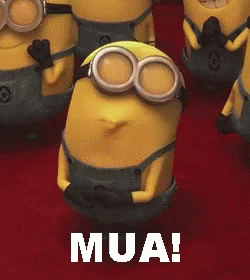